In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, classification_report
from sklearn.metrics import auc,roc_curve,roc_auc_score

In [591]:
train_data=pd.read_csv("651eb042628c11ee/dataset/train.csv")

In [592]:
train_data

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


In [593]:
test_data=pd.read_csv("651eb042628c11ee/dataset/test.csv")

In [594]:
test_data

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications
0,PLID_14644,Ha Matta,16,F,Austria,6'1,163lbs,68.0,68.0,54.0,...,25.6,Right,6.5,0.0,7.7,3.0,Medium,Unknown,1.0,0.0
1,PLID_5934,Rex Weinstock,23,F,South Africa,5'9,170lbs,65.0,73.0,78.0,...,27.6,Right,5.1,1.0,6.1,3.0,Medium,Academy,9.0,0.0
2,PLID_5074,Raisa Angeles,18,F,Netherlands,5'10,154lbs,72.0,79.0,64.0,...,29.4,Left,5.8,0.0,8.4,2.0,Medium,Academy,3.0,0.0
3,PLID_17357,Jong Flewelling,24,F,China PR,6'0,168lbs,64.0,76.0,65.0,...,23.0,Right,5.2,0.0,6.2,6.0,High,Academy,10.0,0.0
4,PLID_13993,Dian Westmoreland,20,F,Australia,6'0,163lbs,53.0,58.0,57.0,...,23.2,Right,4.7,0.0,6.9,3.0,Medium,Talent Hunt,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,PLID_7718,Dorine Brehmer,27,F,England,6'3,172lbs,48.0,47.0,39.0,...,20.2,Right,NaN,0.0,7.0,2.0,High,Talent Hunt,NaN,0.0
9326,PLID_1563,Teri Puente,16,M,Belgium,6'3,169lbs,31.0,38.0,47.0,...,20.4,Right,4.7,NaN,5.8,5.0,Medium,Academy,2.0,0.0
9327,PLID_6017,Gertrud Aleshire,17,M,South Africa,5'10,154lbs,60.0,58.0,68.0,...,26.9,Any,5.1,0.0,6.2,5.0,Medium,Academy,3.0,0.0
9328,PLID_9370,Chantel Corum,16,M,Italy,6'0,165lbs,17.0,32.0,36.0,...,9.2,NaN,5.0,0.0,1.6,2.0,Medium,Academy,2.0,0.0


In [595]:
train_data.nunique()

player_id                    13994
name                         13994
age                             39
gender                           2
country                        163
height                          31
weight                          88
ball_controlling_skills         89
body_reflexes                   84
body_balance                    86
jumping_skills                  74
penalties_conversion_rate       86
mental_strength                 83
goalkeeping_skills              65
defending_skills                78
passing_skills                  77
dribbling_skills                48
shot_accuracy                   79
body_strength_stamina           73
max_running_speed              166
strong_foot                      3
behaviour_rating                64
matches_played                  18
fitness_rating                  85
trophies_won                    10
dedication_level                 3
coaching                         4
years_of_experience             25
no_of_disqualificati

In [596]:
test_data.nunique()

player_id                    9330
name                         9330
age                            35
gender                          2
country                       148
height                         29
weight                         86
ball_controlling_skills        90
body_reflexes                  82
body_balance                   82
jumping_skills                 73
penalties_conversion_rate      82
mental_strength                82
goalkeeping_skills             60
defending_skills               76
passing_skills                 79
dribbling_skills               48
shot_accuracy                  79
body_strength_stamina          67
max_running_speed             162
strong_foot                     3
behaviour_rating               66
matches_played                 17
fitness_rating                 84
trophies_won                   10
dedication_level                3
coaching                        4
years_of_experience            24
no_of_disqualifications        15
dtype: int64

In [597]:
unique=["player_id",'name']
def drop(df,l1):
    df.drop(l1,axis=1,inplace=True)
drop(train_data,unique)

In [598]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13994 non-null  int64  
 1   gender                     13975 non-null  object 
 2   country                    13994 non-null  object 
 3   height                     13994 non-null  object 
 4   weight                     13577 non-null  object 
 5   ball_controlling_skills    13581 non-null  float64
 6   body_reflexes              13994 non-null  float64
 7   body_balance               13994 non-null  float64
 8   jumping_skills             13970 non-null  float64
 9   penalties_conversion_rate  13964 non-null  float64
 10  mental_strength            13966 non-null  float64
 11  goalkeeping_skills         13994 non-null  float64
 12  defending_skills           13994 non-null  float64
 13  passing_skills             13994 non-null  flo

In [599]:
col_list=train_data.columns
col_list

Index(['age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [600]:
def colomn_type(df,col_list):  
    numerical_col=[]
    catagorical_col=[]
    for column in col_list:
        if df[column].dtype==float:
            numerical_col.append(column)
        elif df[column].dtype=="int64":
            numerical_col.append(column)
        else:
            catagorical_col.append(column)
    return catagorical_col,numerical_col

In [601]:
colomn_type(train_data,col_list)

(['gender',
  'country',
  'height',
  'weight',
  'strong_foot',
  'dedication_level',
  'coaching'],
 ['age',
  'ball_controlling_skills',
  'body_reflexes',
  'body_balance',
  'jumping_skills',
  'penalties_conversion_rate',
  'mental_strength',
  'goalkeeping_skills',
  'defending_skills',
  'passing_skills',
  'dribbling_skills',
  'shot_accuracy',
  'body_strength_stamina',
  'max_running_speed',
  'behaviour_rating',
  'matches_played',
  'fitness_rating',
  'trophies_won',
  'years_of_experience',
  'no_of_disqualifications',
  'selection'])

In [602]:
catagorical_col=[
  'gender',
  'country',
  'height',
  'weight',
  'strong_foot',
  'dedication_level',
  'coaching']


numerical_cols=['age',
  'ball_controlling_skills',
  'body_reflexes',
  'body_balance',
  'jumping_skills',
  'penalties_conversion_rate',
  'mental_strength',
  'goalkeeping_skills',
  'defending_skills',
  'passing_skills',
  'dribbling_skills',
  'shot_accuracy',
  'body_strength_stamina',
  'max_running_speed',
  'behaviour_rating',
  'matches_played',
  'fitness_rating',
  'trophies_won',
  'years_of_experience',
  'no_of_disqualifications',
  'selection']
len(catagorical_col)

7

In [603]:
len(numerical_cols)

21

In [604]:
train_data.head(10)

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,59.0,41.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,62.0,53.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,69.0,49.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,86.0,81.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,57.0,49.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
5,21,M,Guinea,6'0,174lbs,63.0,69.0,65.0,65.0,55.0,...,Right,6.3,0.0,6.9,3.0,Medium,Academy,7.0,0.0,0
6,24,F,China PR,5'10,148lbs,64.0,68.0,71.0,53.0,42.0,...,Left,6.9,1.0,7.3,2.0,High,Academy,10.0,0.0,0
7,21,F,United States,5'11,168lbs,58.0,60.0,57.0,74.0,34.0,...,Right,5.9,1.0,6.8,5.0,Medium,Talent Hunt,6.0,0.0,1
8,25,M,Italy,6'0,176lbs,67.0,70.0,58.0,65.0,50.0,...,Right,6.9,0.0,8.2,2.0,Medium,Academy,11.0,0.0,1
9,16,M,Belgium,6'2,183lbs,49.0,56.0,61.0,62.0,27.0,...,Right,4.7,0.0,6.1,2.0,Medium,Unknown,2.0,0.0,1


In [605]:
import statistics

train_data["weight"].fillna(statistics.mode(train_data["weight"]),inplace=True)
            

In [606]:
train_data["weight"]=train_data["weight"].apply(lambda x:x.replace('lbs',""))

In [607]:
train_data["weight"]=train_data["weight"].astype(int)

In [608]:
train_data["weight"]

0        176
1        148
2        172
3        165
4        158
        ... 
13989    161
13990    165
13991    172
13992    150
13993    159
Name: weight, Length: 13994, dtype: int32

In [609]:
train_data["height"]=train_data["height"].apply(lambda x:x.replace("'","."))

In [610]:
train_data["height"]=train_data["height"].astype(float)

In [611]:
train_data['country'].value_counts()

country
England          1157
Germany           838
Spain             796
France            734
Argentina         691
                 ... 
New Caledonia       1
Afghanistan         1
Chad                1
Turkmenistan        1
Oman                1
Name: count, Length: 163, dtype: int64

# MISSING VALUES

In [612]:
train_data.isna().sum()

age                             0
gender                         19
country                         0
height                          0
weight                          0
ball_controlling_skills       413
body_reflexes                   0
body_balance                    0
jumping_skills                 24
penalties_conversion_rate      30
mental_strength                28
goalkeeping_skills              0
defending_skills                0
passing_skills                  0
dribbling_skills                0
shot_accuracy                 572
body_strength_stamina           0
max_running_speed               0
strong_foot                  1833
behaviour_rating              703
matches_played                666
fitness_rating                695
trophies_won                    0
dedication_level                0
coaching                      125
years_of_experience           144
no_of_disqualifications         0
selection                       0
dtype: int64

In [613]:
train_data["gender"].fillna(statistics.mode(train_data["gender"]),inplace=True)

In [614]:
train_data["ball_controlling_skills"].fillna(np.mean(train_data["ball_controlling_skills"]),inplace=True)

In [615]:
train_data["jumping_skills"].fillna(np.mean(train_data["jumping_skills"]),inplace=True)
train_data["penalties_conversion_rate"].fillna(np.mean(train_data["penalties_conversion_rate"]),inplace=True)
train_data["mental_strength"].fillna(np.mean(train_data["mental_strength"]),inplace=True)
train_data["shot_accuracy"].fillna(np.mean(train_data["shot_accuracy"]),inplace=True)
train_data["strong_foot"].fillna(statistics.mode(train_data["strong_foot"]),inplace=True)
train_data["behaviour_rating"].fillna(np.mean(train_data["behaviour_rating"]),inplace=True)
train_data["matches_played"].fillna(np.mean(train_data["matches_played"]),inplace=True)
train_data["fitness_rating"].fillna(np.mean(train_data["fitness_rating"]),inplace=True)
train_data["coaching"].fillna(statistics.mode(train_data["coaching"]),inplace=True)
train_data["years_of_experience"].fillna(np.mean(train_data["years_of_experience"]),inplace=True)






In [616]:
train_data.isna().sum()

age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [617]:
train_data.head(10)

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,M,Ukraine,6.20,176,77.0,58.0,47.0,59.0,41.0,...,Right,7.700000,3.908463,8.100000,2.0,High,Talent Hunt,8.0,0.0,1
1,18,M,Russia,5.10,148,54.0,69.0,70.0,62.0,53.0,...,Any,5.300000,0.000000,6.405482,3.0,Medium,Source,3.0,0.0,0
2,16,F,Spain,6.20,172,34.0,43.0,45.0,69.0,49.0,...,Left,4.700000,0.000000,6.600000,5.0,Low,Academy,2.0,0.0,1
3,27,M,Chile,5.11,165,79.0,73.0,76.0,86.0,81.0,...,Right,8.600000,113.000000,8.600000,6.0,Medium,Academy,13.0,16.0,1
4,19,F,Argentina,5.80,158,47.0,61.0,74.0,57.0,49.0,...,Right,5.822068,0.000000,5.700000,5.0,Medium,Academy,4.0,0.0,0
5,21,M,Guinea,6.00,174,63.0,69.0,65.0,65.0,55.0,...,Right,6.300000,0.000000,6.900000,3.0,Medium,Academy,7.0,0.0,0
6,24,F,China PR,5.10,148,64.0,68.0,71.0,53.0,42.0,...,Left,6.900000,1.000000,7.300000,2.0,High,Academy,10.0,0.0,0
7,21,F,United States,5.11,168,58.0,60.0,57.0,74.0,34.0,...,Right,5.900000,1.000000,6.800000,5.0,Medium,Talent Hunt,6.0,0.0,1
8,25,M,Italy,6.00,176,67.0,70.0,58.0,65.0,50.0,...,Right,6.900000,0.000000,8.200000,2.0,Medium,Academy,11.0,0.0,1
9,16,M,Belgium,6.20,183,49.0,56.0,61.0,62.0,27.0,...,Right,4.700000,0.000000,6.100000,2.0,Medium,Unknown,2.0,0.0,1


In [618]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13994 non-null  int64  
 1   gender                     13994 non-null  object 
 2   country                    13994 non-null  object 
 3   height                     13994 non-null  float64
 4   weight                     13994 non-null  int32  
 5   ball_controlling_skills    13994 non-null  float64
 6   body_reflexes              13994 non-null  float64
 7   body_balance               13994 non-null  float64
 8   jumping_skills             13994 non-null  float64
 9   penalties_conversion_rate  13994 non-null  float64
 10  mental_strength            13994 non-null  float64
 11  goalkeeping_skills         13994 non-null  float64
 12  defending_skills           13994 non-null  float64
 13  passing_skills             13994 non-null  flo

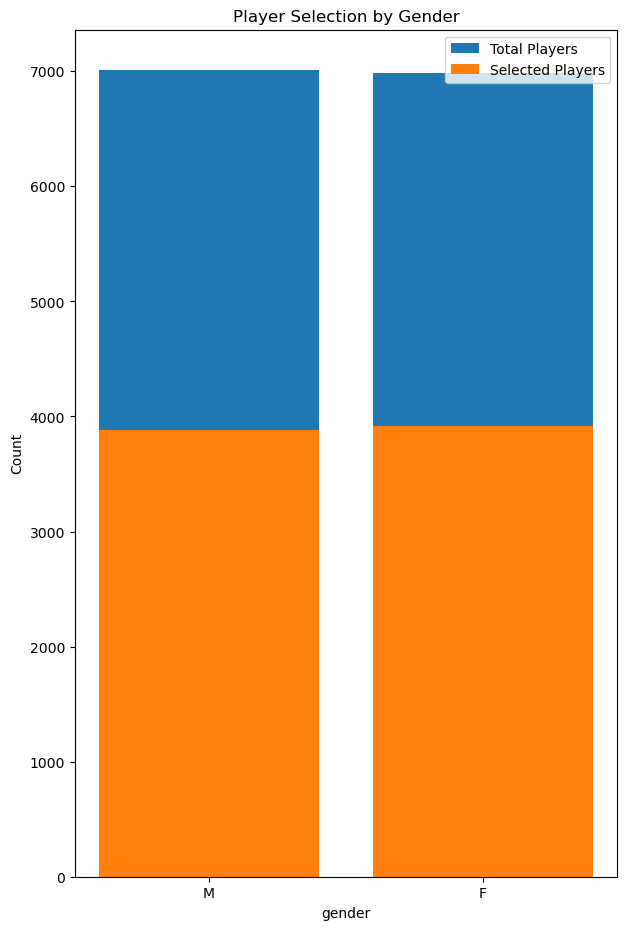

In [619]:
gender_counts = train_data["gender"].value_counts()
selection_counts = train_data[train_data["selection"] == 1]["gender"].value_counts()

# Create a bar chart
plt.figure(figsize=(7,11))
plt.bar(gender_counts.index, gender_counts.values, label="Total Players")
plt.bar(selection_counts.index, selection_counts.values, label="Selected Players")
plt.xlabel("gender")
plt.ylabel("Count")
plt.title("Player Selection by Gender")
plt.legend()
plt.show()



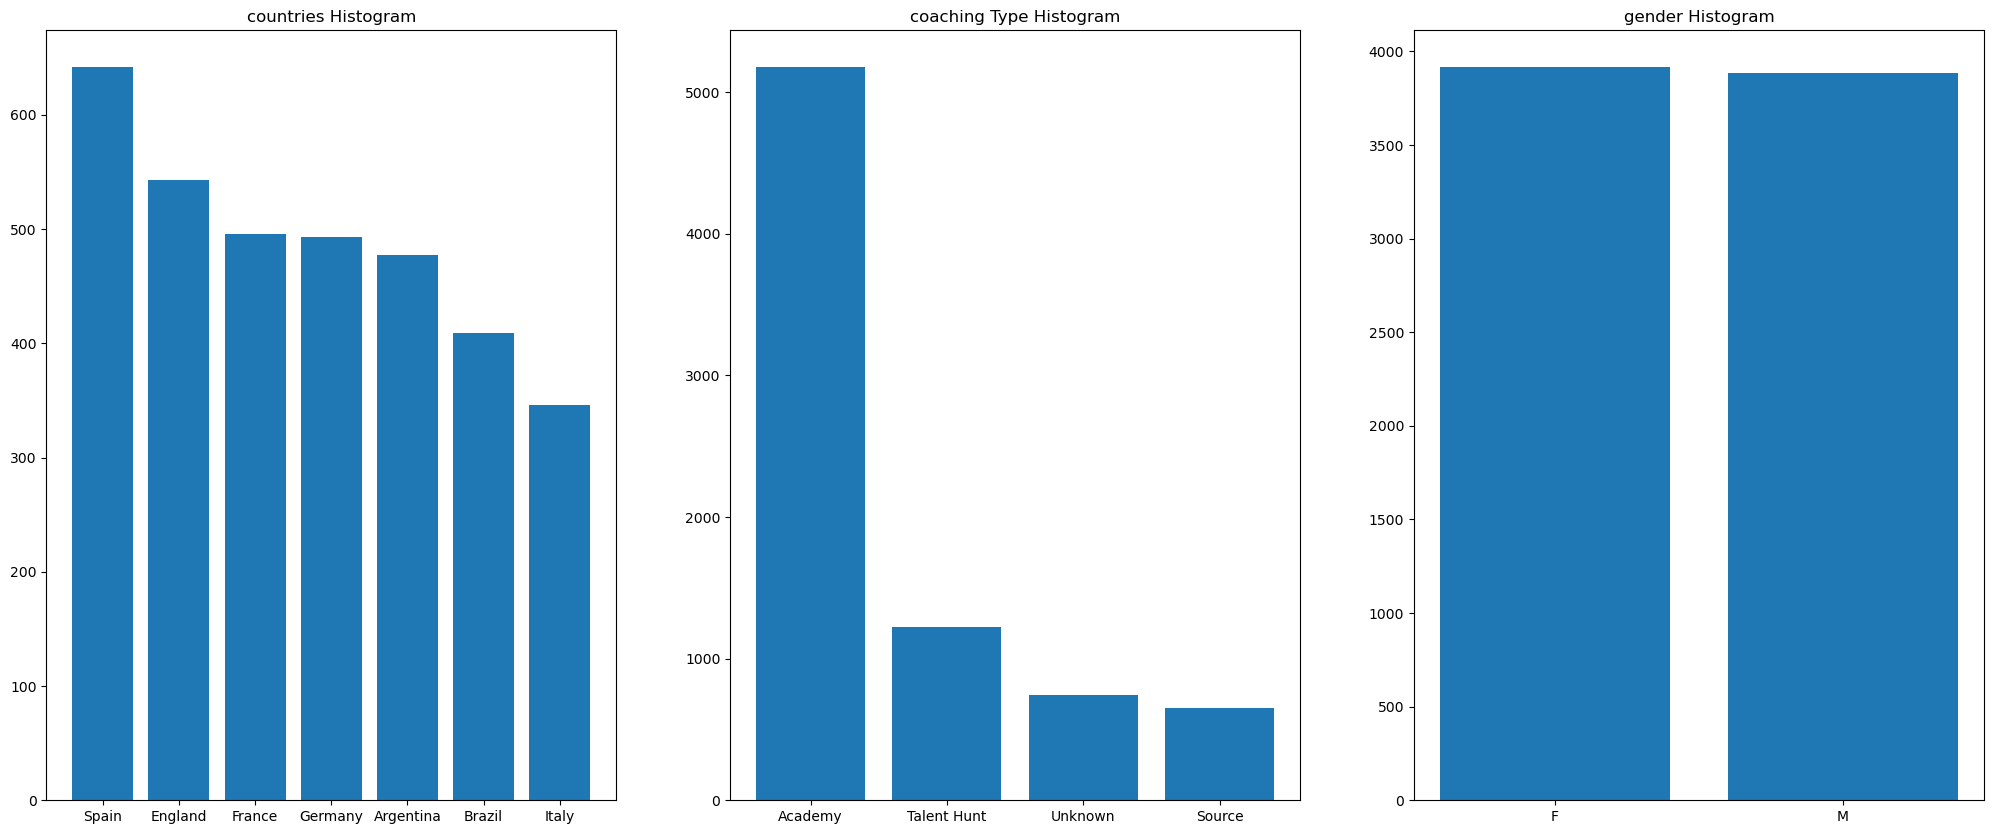

In [620]:
cc =train_data[train_data['selection']==1]['country'].value_counts()
CC =train_data[train_data['selection']==1]['coaching'].value_counts()
gc =train_data[train_data['selection']==1]['gender'].value_counts()


plt.figure(figsize=(25,10))


plt.subplot(1,3,1)
plt.bar(cc[:7].index,cc[:7].values,label="countries") 
plt.title('countries Histogram')


plt.subplot(1,3,2)
plt.bar(CC.index,CC.values,label="coaching")
plt.title('coaching Type Histogram')

plt.subplot(1,3,3)
plt.bar(gc.index,gc.values,label="gender")
plt.title('gender Histogram')

plt.show()


the above garph shows country wise, institue wise and genderwise selected numbers
spain has largest number of getting selected players that is almost 660. and its from acadamy also both female and male that are selected in 
same proportion

In [621]:
group_contriwise=pd.DataFrame()
group_contriwise['country']=train_data['country']
group_contriwise['selection']=train_data['selection']

In [622]:
gg=group_contriwise.groupby('country')

In [623]:
gg

In [624]:
# # cc =train_data[train_data['selection']==1]['country'].value_counts()

# plt.figure(figsize=(25,10))
# plt.bar(gg.index,gg.selection,label="countries",align='edge',) 
# plt.title('countries Histogram')

# BINING

In [625]:
counts=train_data['country'].value_counts()
df=pd.DataFrame(counts,columns=["count"])


In [626]:

# # Assuming you have a DataFrame df with columns "Country" and "Selection"
# # You may need to replace "Selection" with your actual column name

# # Define your custom binning condition
# # For example, you can create bins based on the number of selected players
bin_labels = ["Low Selection", "Moderate Selection", "High Selection"]
bin_values = [0, 50, 100, float("inf")]  # Define your own bin boundaries

# # Use pd.cut() to create bins based on the "Selection" column
df["Selection Category"] = pd.cut(df["count"], bins=bin_values, labels=bin_labels)

# # Now, the "Selection Category" column contains the binned categories

In [627]:
df['Selection Category'].value_counts()

Selection Category
Low Selection         117
High Selection         31
Moderate Selection     15
Name: count, dtype: int64

In [628]:
D1={}
for i in range(0,163):
    D1[df.index[i]]=df['Selection Category'][i]

In [629]:
len(D1)

163

In [630]:
train_data['country'].replace(D1,inplace=True)

In [631]:
train_data['country'].value_counts()

country
High Selection        11582
Low Selection          1326
Moderate Selection     1086
Name: count, dtype: int64

In [632]:
train_data.head(10)

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,M,Low Selection,6.20,176,77.0,58.0,47.0,59.0,41.0,...,Right,7.700000,3.908463,8.100000,2.0,High,Talent Hunt,8.0,0.0,1
1,18,M,High Selection,5.10,148,54.0,69.0,70.0,62.0,53.0,...,Any,5.300000,0.000000,6.405482,3.0,Medium,Source,3.0,0.0,0
2,16,F,High Selection,6.20,172,34.0,43.0,45.0,69.0,49.0,...,Left,4.700000,0.000000,6.600000,5.0,Low,Academy,2.0,0.0,1
3,27,M,High Selection,5.11,165,79.0,73.0,76.0,86.0,81.0,...,Right,8.600000,113.000000,8.600000,6.0,Medium,Academy,13.0,16.0,1
4,19,F,High Selection,5.80,158,47.0,61.0,74.0,57.0,49.0,...,Right,5.822068,0.000000,5.700000,5.0,Medium,Academy,4.0,0.0,0
5,21,M,Low Selection,6.00,174,63.0,69.0,65.0,65.0,55.0,...,Right,6.300000,0.000000,6.900000,3.0,Medium,Academy,7.0,0.0,0
6,24,F,High Selection,5.10,148,64.0,68.0,71.0,53.0,42.0,...,Left,6.900000,1.000000,7.300000,2.0,High,Academy,10.0,0.0,0
7,21,F,High Selection,5.11,168,58.0,60.0,57.0,74.0,34.0,...,Right,5.900000,1.000000,6.800000,5.0,Medium,Talent Hunt,6.0,0.0,1
8,25,M,High Selection,6.00,176,67.0,70.0,58.0,65.0,50.0,...,Right,6.900000,0.000000,8.200000,2.0,Medium,Academy,11.0,0.0,1
9,16,M,High Selection,6.20,183,49.0,56.0,61.0,62.0,27.0,...,Right,4.700000,0.000000,6.100000,2.0,Medium,Unknown,2.0,0.0,1


In [633]:
train_data.describe()

,age,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,...,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000
mean,21.135844,5.809490,165.602973,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,1.568234,15.218375,16.537760,14.931963,14.203638,11.928469,15.750595,11.965754,16.874551,...,15.477606,11.512526,5.194387,1.067824,13.256040,1.664052,1.709152,4.427993,72.023656,0.496698
min,16.000000,1.500000,110.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,5.110000,154.000000,52.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,...,39.000000,56.000000,21.100000,5.100000,0.000000,5.700000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,5.900000,165.000000,60.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,...,49.000000,64.000000,24.600000,5.822068,0.000000,6.700000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,6.100000,176.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,...,58.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,99.000000,243.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [634]:
colomn_type(train_data,col_list)

(['gender',
  'country',
  'weight',
  'strong_foot',
  'dedication_level',
  'coaching'],
 ['age',
  'height',
  'ball_controlling_skills',
  'body_reflexes',
  'body_balance',
  'jumping_skills',
  'penalties_conversion_rate',
  'mental_strength',
  'goalkeeping_skills',
  'defending_skills',
  'passing_skills',
  'dribbling_skills',
  'shot_accuracy',
  'body_strength_stamina',
  'max_running_speed',
  'behaviour_rating',
  'matches_played',
  'fitness_rating',
  'trophies_won',
  'years_of_experience',
  'no_of_disqualifications',
  'selection'])

In [635]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13994 non-null  int64  
 1   gender                     13994 non-null  object 
 2   country                    13994 non-null  object 
 3   height                     13994 non-null  float64
 4   weight                     13994 non-null  int32  
 5   ball_controlling_skills    13994 non-null  float64
 6   body_reflexes              13994 non-null  float64
 7   body_balance               13994 non-null  float64
 8   jumping_skills             13994 non-null  float64
 9   penalties_conversion_rate  13994 non-null  float64
 10  mental_strength            13994 non-null  float64
 11  goalkeeping_skills         13994 non-null  float64
 12  defending_skills           13994 non-null  float64
 13  passing_skills             13994 non-null  flo

In [636]:
numerical_col=['age', 'weight', 'height', 'ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills', 'defending_skills', 'passing_skills', 'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 'max_running_speed', 'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won', 'years_of_experience', 'no_of_disqualifications','selection']

In [637]:
x_numerical=train_data[numerical_col]

In [638]:
x_numerical

,age,weight,height,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
0,23,176,6.20,77.0,58.0,47.0,59.0,41.0,73.0,13.0,...,50.00000,72.0,24.4,7.700000,3.908463,8.100000,2.0,8.0,0.0,1
1,18,148,5.10,54.0,69.0,70.0,62.0,53.0,43.0,10.0,...,53.00000,54.0,22.6,5.300000,0.000000,6.405482,3.0,3.0,0.0,0
2,16,172,6.20,34.0,43.0,45.0,69.0,49.0,45.0,10.0,...,47.17814,66.0,23.2,4.700000,0.000000,6.600000,5.0,2.0,0.0,1
3,27,165,5.11,79.0,73.0,76.0,86.0,81.0,80.0,3.0,...,79.00000,78.0,21.2,8.600000,113.000000,8.600000,6.0,13.0,16.0,1
4,19,158,5.80,47.0,61.0,74.0,57.0,49.0,35.0,9.0,...,35.00000,56.0,23.4,5.822068,0.000000,5.700000,5.0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,20,161,6.00,60.0,48.0,62.0,60.0,40.0,61.0,10.0,...,48.00000,66.0,18.9,6.000000,3.908463,7.600000,2.0,6.0,0.0,1
13990,18,165,5.10,53.0,68.0,59.0,73.0,24.0,55.0,11.0,...,34.00000,60.0,24.9,5.300000,0.000000,5.600000,3.0,4.0,0.0,0
13991,17,172,6.00,56.0,73.0,62.0,50.0,47.0,64.0,10.0,...,49.00000,72.0,28.5,5.700000,0.000000,7.700000,3.0,2.0,0.0,1
13992,20,150,5.10,71.0,69.0,70.0,51.0,56.0,59.0,9.0,...,57.00000,49.0,25.5,6.800000,1.000000,5.800000,4.0,6.0,0.0,1


In [639]:
catagorical_col=['gender',
  'country',
  'strong_foot',
  'dedication_level',
  'coaching']

In [640]:
x_catagorical=train_data[catagorical_col]

In [641]:
x_catagorical

,gender,country,strong_foot,dedication_level,coaching
0,M,Low Selection,Right,High,Talent Hunt
1,M,High Selection,Any,Medium,Source
2,F,High Selection,Left,Low,Academy
3,M,High Selection,Right,Medium,Academy
4,F,High Selection,Right,Medium,Academy
...,...,...,...,...,...
13989,M,High Selection,Right,Medium,Academy
13990,F,High Selection,Right,Medium,Academy
13991,M,High Selection,Left,Low,Talent Hunt
13992,F,Low Selection,Left,Medium,Academy


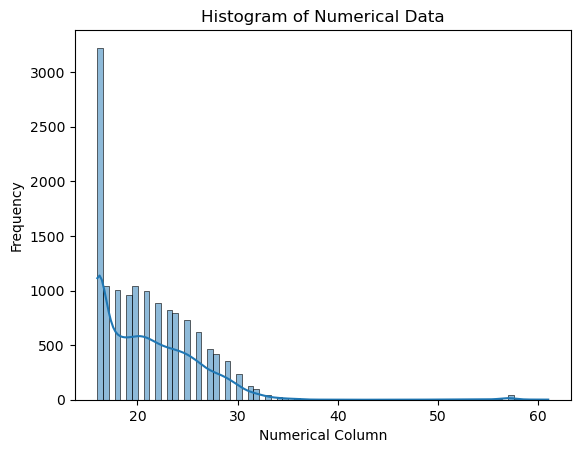

In [642]:
sns.histplot(data=x_numerical, x='age', kde=True)
plt.xlabel('Numerical Column')
plt.ylabel('Frequency')
plt.title('Histogram of Numerical Data')
plt.show()

most of the players are in the Age range of 8-33 year where players who has age 8 years are are the most that is 3300

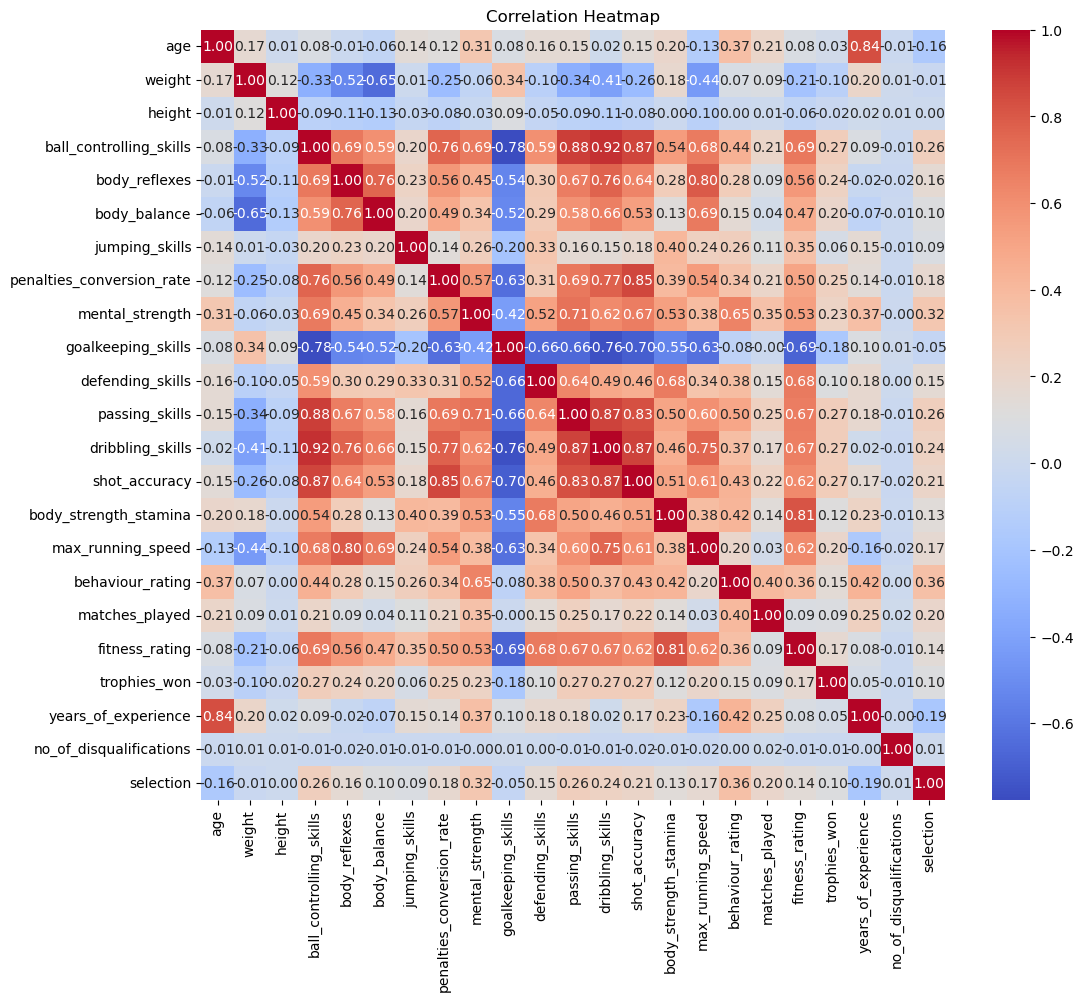

In [643]:
correlation_matrix = x_numerical.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [644]:
x_numerical.drop('selection',axis=1,inplace=True)
scale=StandardScaler()
scaled_data=scale.fit_transform(x_numerical)

C:\Users\Amar\AppData\Local\Temp\ipykernel_13564\3362487499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_numerical.drop('selection',axis=1,inplace=True)


In [645]:
scaled_df=pd.DataFrame(scaled_data,columns=x_numerical.columns)

In [646]:
scaled_df

,age,weight,height,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications
0,0.361093,0.683213,0.249022,1.267208,-0.263493,-1.109144,-0.386654,-0.475917,1.356556,-0.205917,...,0.766651,1.823254e-01,0.811946,0.156695,1.758717,0.000000,1.018345e+00,-0.812768,0.353637,0.065823
1,-0.607423,-1.156733,-0.452429,-0.123598,0.473208,0.510217,-0.135146,0.285987,-1.150689,-0.383706,...,0.150312,3.761607e-01,-0.751624,-0.189845,-0.488926,-0.294854,5.337636e-16,-0.227662,-0.775583,0.065823
2,-0.994830,0.420364,0.249022,-1.332995,-1.268085,-1.249958,0.451706,0.032019,-0.983539,-0.383706,...,-1.082366,-4.590943e-16,0.290756,-0.074332,-1.050836,-0.294854,1.168986e-01,0.942550,-1.001427,0.065823
3,1.135906,-0.039623,-0.446052,1.388148,0.741099,0.932659,1.876919,2.063761,1.941580,-0.798546,...,1.177544,2.056067e+00,1.333136,-0.459377,2.601583,8.229866,1.318827e+00,1.527657,1.482858,0.287981
4,-0.413720,-0.499609,-0.006051,-0.546887,-0.062575,0.791845,-0.554326,0.032019,-1.819287,-0.442969,...,0.561204,-7.868514e-01,-0.577894,-0.035827,0.000000,-0.294854,-4.239693e-01,0.942550,-0.549739,0.065823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,-0.220017,-0.302472,0.121485,0.239221,-0.933221,-0.053039,-0.302818,-0.539409,0.353658,-0.383706,...,0.150312,5.310182e-02,0.290756,-0.902178,0.166637,0.000000,7.178629e-01,-0.812768,-0.098051,0.065823
13990,-0.607423,-0.039623,-0.452429,-0.184068,0.406235,-0.264260,0.787051,-1.555280,-0.147791,-0.324443,...,-0.876920,-8.514632e-01,-0.230434,0.252956,-0.488926,-0.294854,-4.840657e-01,-0.227662,-0.549739,0.065823
13991,-0.801127,0.420364,0.121485,-0.002658,0.741099,-0.053039,-1.141178,-0.094965,0.604382,-0.383706,...,-0.055135,1.177136e-01,0.811946,0.946037,-0.114318,-0.294854,7.779594e-01,-0.227662,-1.001427,0.065823
13992,-0.220017,-1.025309,-0.452429,0.904389,0.473208,0.510217,-1.057342,0.476462,0.186508,-0.442969,...,0.972097,6.346079e-01,-1.185949,0.368470,0.915851,-0.219414,-3.638729e-01,0.357444,-0.098051,0.065823


In [647]:

one_hot_encoded = pd.get_dummies(x_catagorical, columns=x_catagorical.columns, prefix=x_catagorical.columns)



In [648]:
data1 = {'A': [1, 2, 3], 'B': [4, 5, 6]}
data2 = {'A': [7, 8, 9], 'B': [10, 11, 12]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Concatenate vertically (stack rows) and introduce NaN values
result_vertical = pd.concat([df1, df2], axis=1, ignore_index=True)

In [649]:
result_vertical

,0,1,2,3
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12


In [650]:
one_hot_encoded.shape

(13994, 15)

In [651]:
scaled_df.shape

(13994, 22)

In [652]:
processed_df= pd.concat([one_hot_encoded, scaled_df], axis=1, ignore_index=False)

In [653]:
processed_df.isna().sum()

gender_F                      0
gender_M                      0
country_High Selection        0
country_Low Selection         0
country_Moderate Selection    0
strong_foot_Any               0
strong_foot_Left              0
strong_foot_Right             0
dedication_level_High         0
dedication_level_Low          0
dedication_level_Medium       0
coaching_Academy              0
coaching_Source               0
coaching_Talent Hunt          0
coaching_Unknown              0
age                           0
weight                        0
height                        0
ball_controlling_skills       0
body_reflexes                 0
body_balance                  0
jumping_skills                0
penalties_conversion_rate     0
mental_strength               0
goalkeeping_skills            0
defending_skills              0
passing_skills                0
dribbling_skills              0
shot_accuracy                 0
body_strength_stamina         0
max_running_speed             0
behaviou

In [654]:
x=processed_df

In [655]:
y=train_data['selection']

In [656]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [657]:
lr_model=LogisticRegression()

In [658]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [659]:
y_pred_lr=lr_model.predict(x_test)

In [660]:
y_pred_lr[:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [661]:
y_test[:10]

1670     0
710      0
8432     1
7158     0
9499     0
2310     1
7205     1
8550     1
13986    1
12879    0
Name: selection, dtype: int64

In [662]:
acc_score_lr=accuracy_score(y_pred_lr,y_test)
print("Logistic Regression model accuracy:",acc_score_lr)

Logistic Regression model accuracy: 0.779471302691117


In [663]:
con_lr=confusion_matrix(y_pred_lr,y_test)
print("Logistic Regression confusion matrix :",con_lr)

Logistic Regression confusion matrix : [[1386  439]
 [ 487 1887]]


In [664]:
f1_lr=f1_score(y_pred_lr,y_test)
print("Logistic Regression f1 score :",f1_lr)

Logistic Regression f1 score : 0.8029787234042552


In [665]:
class_report_lr = classification_report(y_test, y_pred_lr)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1873
           1       0.79      0.81      0.80      2326

    accuracy                           0.78      4199
   macro avg       0.78      0.78      0.78      4199
weighted avg       0.78      0.78      0.78      4199



In [666]:
# tpr=tp/tp+fn#recall
# fpr=tp/tp+fp#precison
tpr=1386/(1386+487)
tpr

0.7399893219434063

In [667]:
fpr=1386/(1386+439)
fpr

0.7594520547945205

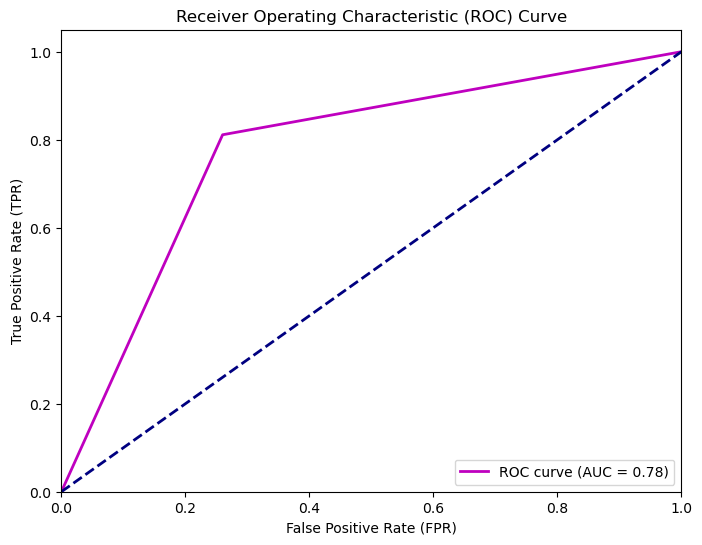

In [668]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='m', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

In [669]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)

y_pred_dt = dt_classifier.predict(x_test)

accuracy_dt= accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(f"Accuracy: {accuracy_dt:.2f}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print("Classification Report:")
print(class_report_dt)


Accuracy: 0.80
Confusion Matrix:
[[1446  427]
 [ 428 1898]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1873
           1       0.82      0.82      0.82      2326

    accuracy                           0.80      4199
   macro avg       0.79      0.79      0.79      4199
weighted avg       0.80      0.80      0.80      4199



In [670]:
param_grid = {'min_samples_leaf':[1, 2, 5, 10, 20],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10, 20]
               }

grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(x_train,y_train)

best_params = grid_search_dt.best_params_
best_estimator = grid_search_dt.best_estimator_


y_pred_dt_grid = best_estimator.predict(x_test)
accuracy_dt_grid = accuracy_score(y_test, y_pred_dt_grid)
conf_matrix_dt_grid = confusion_matrix(y_test, y_pred_dt_grid)
class_report_dt_grid = classification_report(y_test, y_pred_dt_grid)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy with Best Hyperparameters: {accuracy_dt_grid:.2f}")
print("Confusion Matrix:")
print(conf_matrix_dt_grid)
print("Classification Report:")
print(class_report_dt_grid)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 2}
Accuracy with Best Hyperparameters: 0.82
Confusion Matrix:
[[1531  342]
 [ 411 1915]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1873
           1       0.85      0.82      0.84      2326

    accuracy                           0.82      4199
   macro avg       0.82      0.82      0.82      4199
weighted avg       0.82      0.82      0.82      4199



In [671]:
param_grid = {'min_samples_leaf':[1, 2, 5, 10, 20],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10, 20]
               }
randomcv_dt=RandomizedSearchCV(dt_classifier,param_grid,cv=5,scoring="accuracy")
randomcv_dt.fit(x_train,y_train)


best_params_randomcv = randomcv_dt.best_params_
best_estimator_randomcv = randomcv_dt.best_estimator_


y_pred_dt_randomcv = best_estimator_randomcv.predict(x_test)
accuracy_dt_randomcv = accuracy_score(y_test, y_pred_dt_randomcv)
conf_matrix_dt_randomcv = confusion_matrix(y_test, y_pred_dt_randomcv)
class_report_dt_randomcv = classification_report(y_test, y_pred_dt_randomcv)

print(f"Best Hyperparameters: {best_params_randomcv}")
print(f"Accuracy with Best Hyperparameters: {accuracy_dt_randomcv:.2f}")
print("Confusion Matrix:")
print(conf_matrix_dt_randomcv)
print("Classification Report:")
print(class_report_dt_randomcv)

Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 20, 'max_depth': 10}
Accuracy with Best Hyperparameters: 0.82
Confusion Matrix:
[[1531  342]
 [ 411 1915]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1873
           1       0.85      0.82      0.84      2326

    accuracy                           0.82      4199
   macro avg       0.82      0.82      0.82      4199
weighted avg       0.82      0.82      0.82      4199



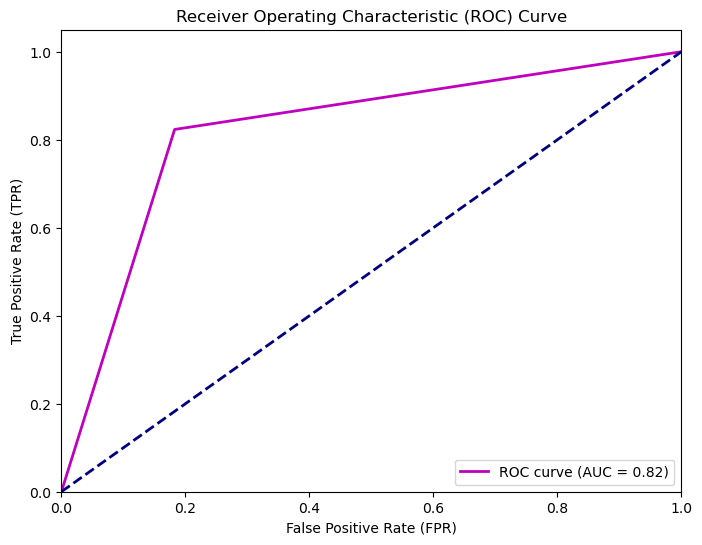

In [681]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_randomcv)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='m', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random forrest

In [690]:
rf_classifier = RandomForestClassifier(n_estimators=400,oob_score=True,random_state=42)
rf_classifier.fit(x_train, y_train)


y_pred_rf = rf_classifier.predict(x_test)

oob_error = 1 - rf_classifier.oob_score_

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(class_report_rf)
print(f"OOB Error Estimate: {oob_error:.2f}")


Accuracy: 0.86
Confusion Matrix:
[[1555  318]
 [ 278 2048]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1873
           1       0.87      0.88      0.87      2326

    accuracy                           0.86      4199
   macro avg       0.86      0.86      0.86      4199
weighted avg       0.86      0.86      0.86      4199

OOB Error Estimate: 0.15


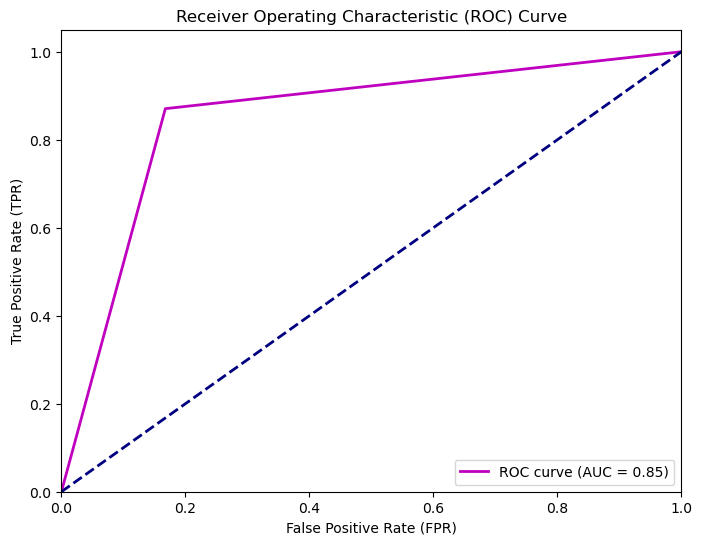

In [682]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='m', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [679]:
# param_grid_rf = {
#                 'n_estimators': [50, 100, 200],          # Number of trees in the forest
#                 'max_depth': [None, 10, 20, 30],        # Maximum depth of trees
#                 'min_samples_split': [2, 5, 10],       # Minimum samples required to split an internal node
#                 'min_samples_leaf': [1, 2, 4],         # Minimum samples required in a leaf node
#                 'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
#             }


# # Perform grid search with cross-validation
# grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
# grid_search_rf.fit(x_train, y_train)

# # Get the best hyperparameters and best estimator
# best_params_rf = grid_search_rf.best_params_
# best_estimator_rf = grid_search_rf.best_estimator_

# # Evaluate the model with the best hyperparameters
# y_pred_gscv_rf = grid_search_rf.predict(x_test)
# accuracy_gscv_rf = accuracy_score(y_test, y_pred_gscv_rf)

# conf_matrix_gscv_rf = confusion_matrix(y_test, y_pred_gscv_rf)
# class_report_gscv_rf = classification_report(y_test, y_pred_gscv_rf)

# # Print the best hyperparameters and model accuracy
# print(f"Best Hyperparameters: {best_params_rf}")
# print(f"Accuracy with Best Hyperparameters: {accuracy_gscv_rf:.2f}")

# print("confusion matrix:",conf_matrix_gscv_rf)
# print("classification report:",class_report_gscv_rf)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packa

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy with Best Hyperparameters: 0.86
confusion matrix: [[1547  326]
 [ 281 2045]]
classification report:               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1873
           1       0.86      0.88      0.87      2326

    accuracy                           0.86      4199
   macro avg       0.85      0.85      0.85      4199
weighted avg       0.86      0.86      0.86      4199



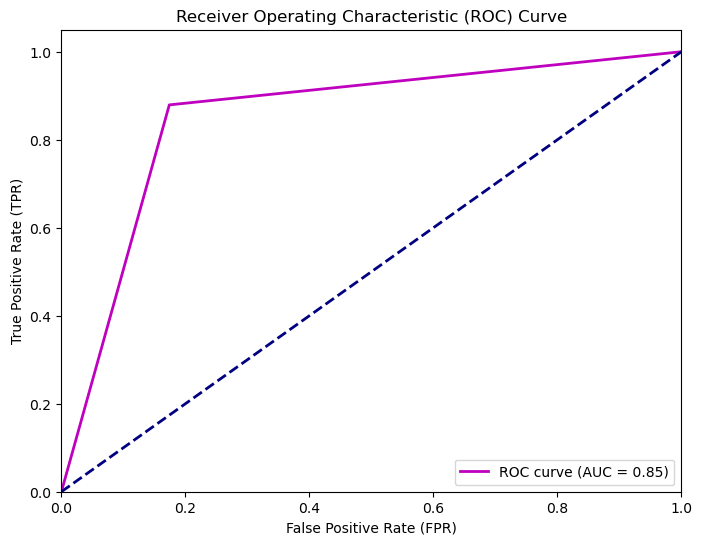

In [683]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gscv_rf)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='m', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [680]:
param_grid_rf = {
                'n_estimators': [50, 100, 200],          # Number of trees in the forest
                'max_depth': [None, 10, 20, 30],        # Maximum depth of trees
                'min_samples_split': [2, 5, 10],       # Minimum samples required to split an internal node
                'min_samples_leaf': [1, 2, 4],         # Minimum samples required in a leaf node
                'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
            }


random_search_rf = RandomizedSearchCV(rf_classifier,param_grid_rf, cv=5, scoring='accuracy')
random_search_rf.fit(x_train, y_train)


# Get the best hyperparameters and best estimator
best_params_rscv_rf = random_search_rf.best_params_
best_estimator_rscv_rf = random_search_rf.best_estimator_

# Evaluate the model with the best hyperparameters
y_pred_rscv_rf = random_search_rf.predict(x_test)
accuracy_rscv_rf = accuracy_score(y_test, y_pred_rscv_rf)

conf_matrix_rscv_rf = confusion_matrix(y_test, y_pred_rscv_rf)
class_report_rscv_rf = classification_report(y_test, y_pred_rscv_rf)
# Print the best hyperparameters and model accuracy
print(f"Best Hyperparameters: {best_params_rscv_rf}")
print(f"Accuracy with Best Hyperparameters: {accuracy_rscv_rf:.2f}")
print("confusion matrix:",conf_matrix_rscv_rf)
print("classification report:",conf_matrix_rscv_rf)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
Accuracy with Best Hyperparameters: 0.86
confusion matrix: [[1544  329]
 [ 277 2049]]
classification report: [[1544  329]
 [ 277 2049]]


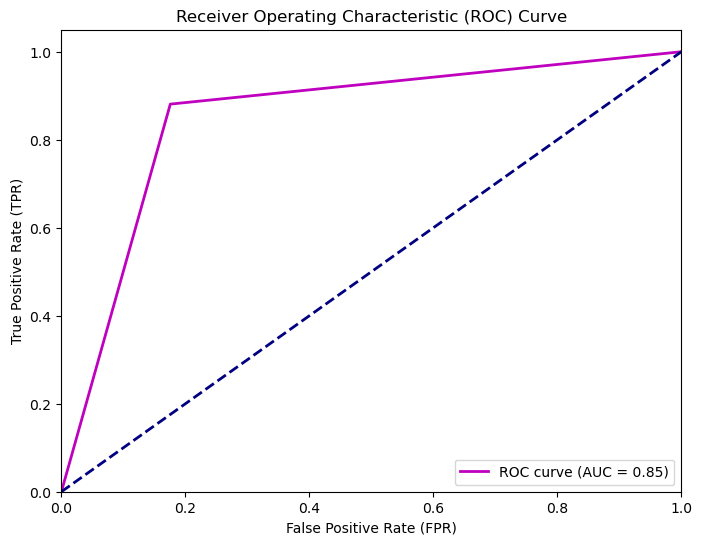

In [684]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rscv_rf)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='m', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

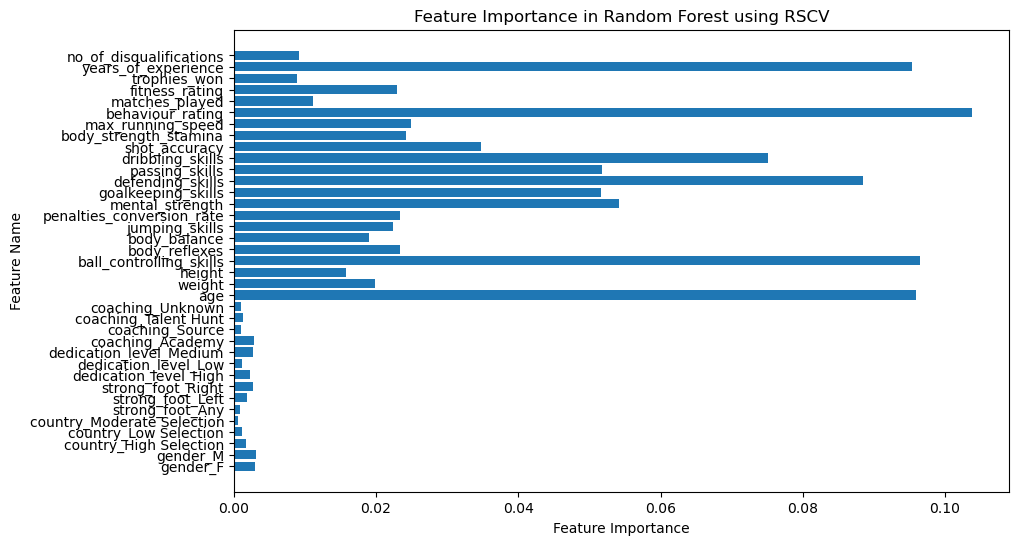

In [692]:
 feature_importance_rscv_rf = best_estimator_rscv_rf.feature_importances_
feature_names = processed_df.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_rscv_rf,)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Random Forest using RSCV')
plt.show()

# Ada Boost

In [713]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Load your dataset into a Pandas DataFrame

# Split the data into features (X) and the target variable (y)

# Split the data into training and testing sets

# Initialize a weak classifier, such as a Decision Tree
weak_classifier = DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split= 2)

# Initialize the AdaBoost classifier with the weak classifier and a specified number of estimators (e.g., 50)
adaboost_classifier = AdaBoostClassifier(base_estimator=weak_classifier, n_estimators=50, random_state=42)

# Fit the AdaBoost classifier to the training data
adaboost_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred_adaboost = adaboost_classifier.predict(x_test)

# Evaluate the model using metrics such as accuracy, classification report, and confusion matrix
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
class_report_adaboost = classification_report(y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)

print(f"Accuracy: {accuracy_adaboost:.2f}")
print("Classification Report:")
print(class_report_adaboost)
print("Confusion Matrix:")
print(conf_matrix_adaboost)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1873
           1       0.84      0.84      0.84      2326

    accuracy                           0.82      4199
   macro avg       0.82      0.82      0.82      4199
weighted avg       0.82      0.82      0.82      4199

Confusion Matrix:
[[1508  365]
 [ 381 1945]]



# Pickling The Model File For Deployment

In [714]:
import pickle

In [715]:
pickle.dump(random_search_rf,open("random_forrest_rscv.pkl",'wb'))

In [717]:
pickled_model=pickle.load(open("random_forrest_rscv.pkl",'rb'))

In [720]:
yp=pickled_model.predict(x_test)

In [724]:
acc1=accuracy_score(y_test,yp)
acc1

0.8556799237913789